In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import sys

Using TensorFlow backend.


In [2]:
train_dir = r"D:\CODES\code_tutorial_workshop\CUTe_workshop-master\clean-dataset/train" #r for raw string
validation_dir = r"D:\CODES\code_tutorial_workshop\CUTe_workshop-master\clean-dataset/validation"

train_num = 0 # count no. of training data
for r, d, files in os.walk(train_dir):
    train_num +=len(files)
    
validation_num = 0 # count no. of testing data
for r, d, files in os.walk(validation_dir):
    validation_num +=len(files)
    

In [3]:
# use ImageDataGenerator class to load images and
# flow_from_directory function to generate batches of images and labels

datagen = ImageDataGenerator(rescale = 1./255)
batchSize = 32 # 32 is a good starting point
inputSize = 30

train_generator = datagen.flow_from_directory(
    train_dir, 
    target_size = (inputSize,inputSize),  
    batch_size = batchSize,
    class_mode = 'categorical', 
    shuffle = True)

validation_generator = datagen.flow_from_directory(
    validation_dir, 
    target_size = (inputSize,inputSize), 
    batch_size = batchSize,
    class_mode = 'categorical', 
    shuffle = False)

# initialize the image matrix and label
train_features = np.zeros(shape=(train_num, 30,30,3))
train_labels = np.zeros(shape=(train_num,3))

# Gathering all training images in one matrix
i = 0
for inputs_batch, labels_batch in train_generator:
    train_features[i * batchSize : (i + 1) * batchSize] = inputs_batch
    train_labels[i * batchSize : (i + 1) * batchSize] = labels_batch
    i += 1
    if i * batchSize >= train_num:
        break
        
train_features = np.reshape(train_features, (train_num, 30 * 30 * 3)) # flatten the image

# do the same for testing images
validation_features = np.zeros(shape=(validation_num, 30, 30, 3))
validation_labels = np.zeros(shape=(validation_num,3))

i = 0
for inputs_batch, labels_batch in validation_generator:
    validation_features[i * batchSize : (i + 1) * batchSize] = inputs_batch
    validation_labels[i * batchSize : (i + 1) * batchSize] = labels_batch
    i += 1
    if i * batchSize >= validation_num:
        break

validation_features = np.reshape(validation_features, (validation_num, 30 * 30 * 3))



Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
print(train_features.shape)
print(validation_features.shape)

(600, 2700)
(150, 2700)


In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2048, activation = tf.nn.relu, input_shape=(inputSize*inputSize*3,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

W0925 12:22:33.843594 14980 deprecation.py:506] From C:\Users\Hasan\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# import sys
# !conda install pillow
# images,labels = next(train_generator)
# print(labels.shape)
# plt.imshow(images[0])
# plt.show

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6,momentum=0.9,nesterov=True),
             loss = 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_features,
                    train_labels,
                    epochs=3,
                    batch_size=batchSize,
                    validation_data=(validation_features,validation_labels))

Train on 600 samples, validate on 150 samples
Epoch 1/3
600/600 [==============================] - ETA: 0s - loss: 1.2425 - acc: 0.331 - 2s 3ms/sample - loss: 1.2434 - acc: 0.3283 - val_loss: 1.0901 - val_acc: 0.3667
Epoch 2/3
600/600 [==============================] - 1s 2ms/sample - loss: 1.1770 - acc: 0.3450 - val_loss: 1.0723 - val_acc: 0.4333
Epoch 3/3
600/600 [==============================] - 1s 2ms/sample - loss: 1.1503 - acc: 0.3550 - val_loss: 1.0460 - val_acc: 0.4133


In [8]:
test_loss, test_acc = model.evaluate(validation_features,validation_labels)
print(test_loss, test_acc)

150/150 [==============================] - 0s 520us/sample - loss: 1.0460 - acc: 0.4133
1.0460378694534302 0.41333333


Text(0.5, 1.0, 'Accuracy Curves')

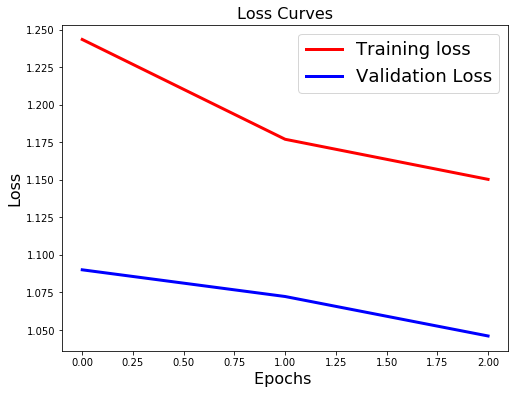

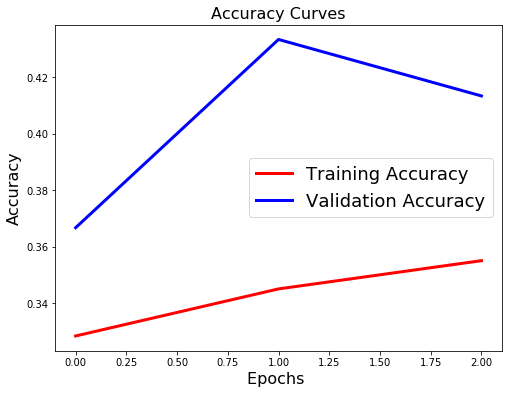

In [9]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [10]:
model.save('fullyConnected_owndata.h5')
new_model = tf.keras.models.load_model('fullyConnected_owndata.h5')


W0925 12:22:59.259052 14980 deprecation.py:506] From C:\Users\Hasan\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0925 12:22:59.260072 14980 deprecation.py:506] From C:\Users\Hasan\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
import cv2
# from PIL import Image
video = cv2.VideoCapture(0)

while True:

    __,frame = video.read()
       
#     im = cv2.resize(frame,(30,30))
#     im = im.reshape(30*30*3)
#     im = tf.keras.utils.normalize(im)
# #     img_array = np.array(im)
#     predictions = new_model.predict(im)
#     label = np.argmax(predictions)
    
#     if label == 0: 
#          label = 'pumpkin'
#     elif label == 1: 
#          label = 'tomato'
#     elif label == 2: 
#          label = 'watermelon'
#     # Display the predictions
#     cv2.putText(frame, "Label: {}".format(label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
#     cv2.imshow("Classification", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
          break

video.release()
cv2.destroyAllWindows() 